# Custom Machine Learning algorithm for Crop Yield prediction

Name: James Antony Das


### Table of Contents

 1. Problem Definition
 2. Exploratory Data Analysis
 3. Curve fitting
 4. Hypothesis Testing
 5. Regression Analysis
 6. **Custom Machine learning algorithm**
 7. Comparing with other machine learning models
 8. Model Accuracy
 9. Symbolic Regression Analysis
 10. Model Deployment
 11. Bussiness Recommendation
 12. Conclusion

# Problem Definition

Modern agriculture faces the challenge of increasing global food demands while mitigating the impacts of climate change and resource scarcity. Artificial intelligence (AI) and machine learning  offer transformative solutions by enabling precise, data-driven decision-making. This project is done as part of the Innovative AI chanllenge by Venusmoon. This project report explores the application of AI and ML tools in predicting crop yield, a critical factor in optimizing agricultural productivity.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/innovate_kaggle/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/innovate_kaggle/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/innovate_kaggle/sample_submission.csv')

In [ ]:
train = train_data.copy()
test = test_data.copy()
train.shape, test.shape

((55, 8), (8, 7))

In [ ]:
train[train.Crop_Type == 'Bajra'].describe()

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,46.500000,2010.055556,489.738889,4.222222,736.833333
std,5.338539,7.116445,95.451633,1.845043,399.657096
min,38.000000,2000.000000,314.500000,1.200000,0.000000
25%,42.250000,2004.250000,420.400000,2.875000,586.500000
50%,46.500000,2008.500000,482.550000,4.400000,851.500000
75%,50.750000,2016.750000,563.650000,5.350000,977.750000
max,55.000000,2021.000000,662.800000,7.600000,1495.000000


**Insight**
* There are 55 rows and 8 columns in training set
* There are 8 rows and 7 columns in test set

In [ ]:
train.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304


In [ ]:
train.describe().style.background_gradient(cmap='Blues')

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,28.000000,2009.527273,473.881818,2082.207273,3079.418182
std,16.020820,6.394021,106.836760,1495.190498,1706.608372
min,1.000000,2000.000000,218.900000,1.200000,0.000000
25%,14.500000,2004.000000,391.900000,5.500000,985.500000
50%,28.000000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.500000,2015.000000,561.400000,3393.250000,4305.500000
max,55.000000,2021.000000,662.800000,3515.200000,5188.000000


In [ ]:
test.head()

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area
0,1001,2021,Punjab,Wheat,556.9,Loamy,3500.7
1,1002,2020,Punjab,Wheat,602.6,Loamy,3509.5
2,1003,2019,Punjab,Rice,578.6,alluvial,3091.8
3,1004,2018,Punjab,Rice,598.3,alluvial,3057.9
4,1005,2017,Punjab,Rice,493.0,alluvial,3033.0


In [ ]:
train.describe().style.background_gradient(cmap='Purples')

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,28.000000,2009.527273,473.881818,2082.207273,3079.418182
std,16.020820,6.394021,106.836760,1495.190498,1706.608372
min,1.000000,2000.000000,218.900000,1.200000,0.000000
25%,14.500000,2004.000000,391.900000,5.500000,985.500000
50%,28.000000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.500000,2015.000000,561.400000,3393.250000,4305.500000
max,55.000000,2021.000000,662.800000,3515.200000,5188.000000


# Exploratory Data Analysis

## Numerical Variables

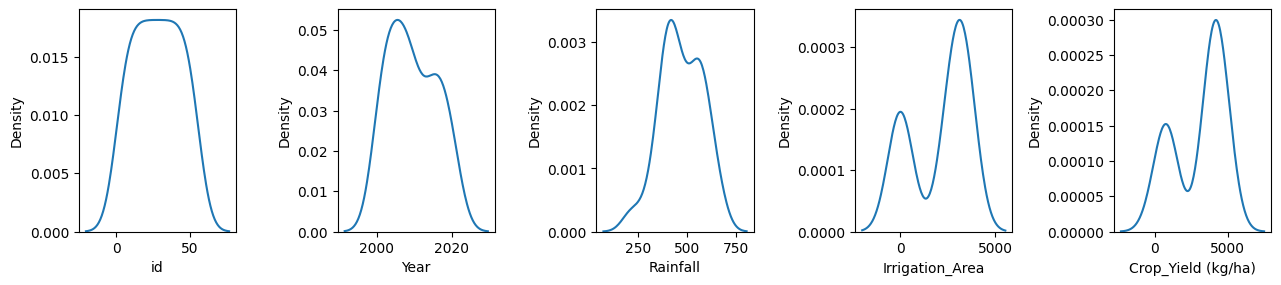

In [ ]:
cols = train.select_dtypes(include=['float64', 'int64']).columns
fig, ax = plt.subplots(1, len(cols), figsize = (13,3))
# Visualizing 5 numeric columns
for i, col in enumerate(cols):
  sns.kdeplot(train, x = col, ax = ax[i], legend=True)
plt.tight_layout()

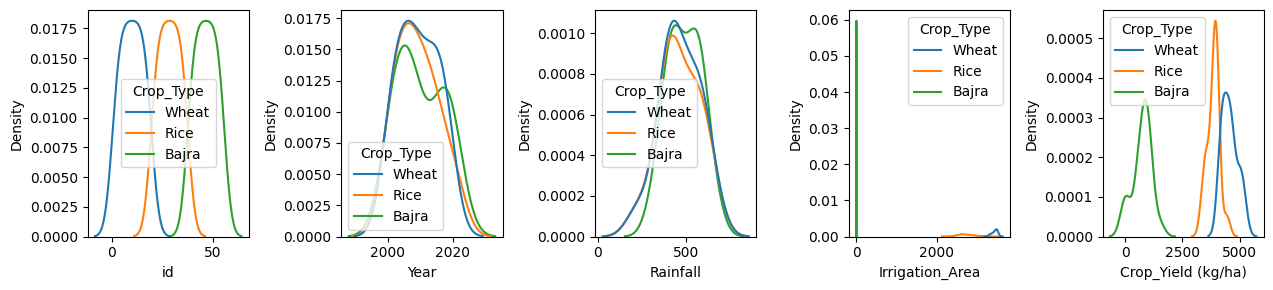

In [ ]:
cols = train.select_dtypes(include=['float64', 'int64']).columns
fig, ax = plt.subplots(1, len(cols), figsize = (13,3))
# Visualizing 5 numeric columns
for i, col in enumerate(cols):
  sns.kdeplot(train, x = col, ax = ax[i], legend=True, hue='Crop_Type')
plt.tight_layout()

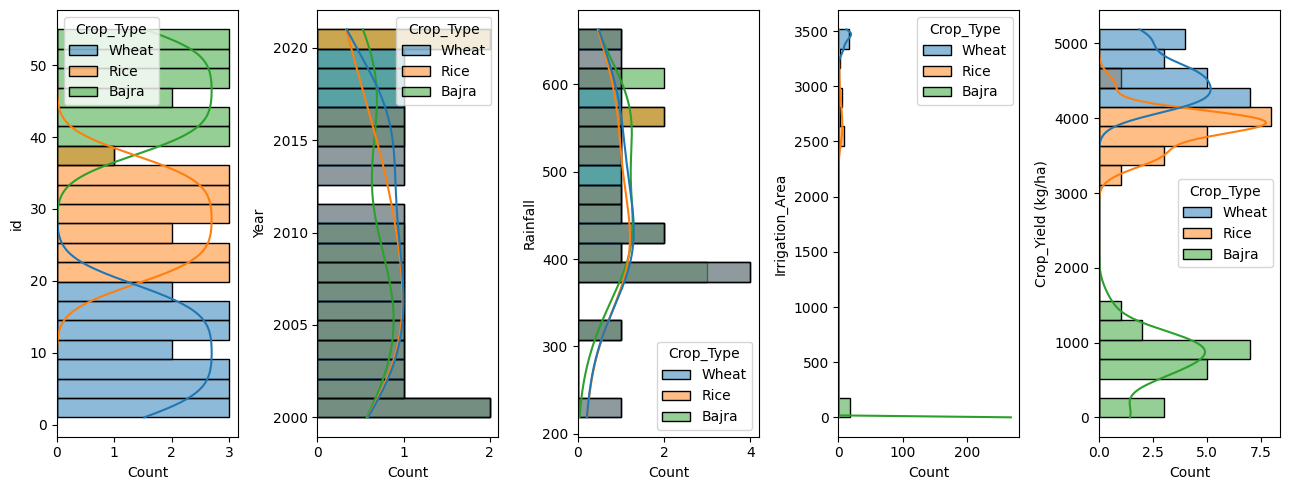

In [ ]:
cols = train.select_dtypes(include=['float64', 'int64']).columns
fig, ax = plt.subplots(1, len(cols), figsize = (13,5))
# Visualizing 5 numeric columns
for i, col in enumerate(cols):
  sns.histplot(train, y = col, ax = ax[i], kde=True, hue= 'Crop_Type', legend=True, bins=20)
plt.tight_layout()

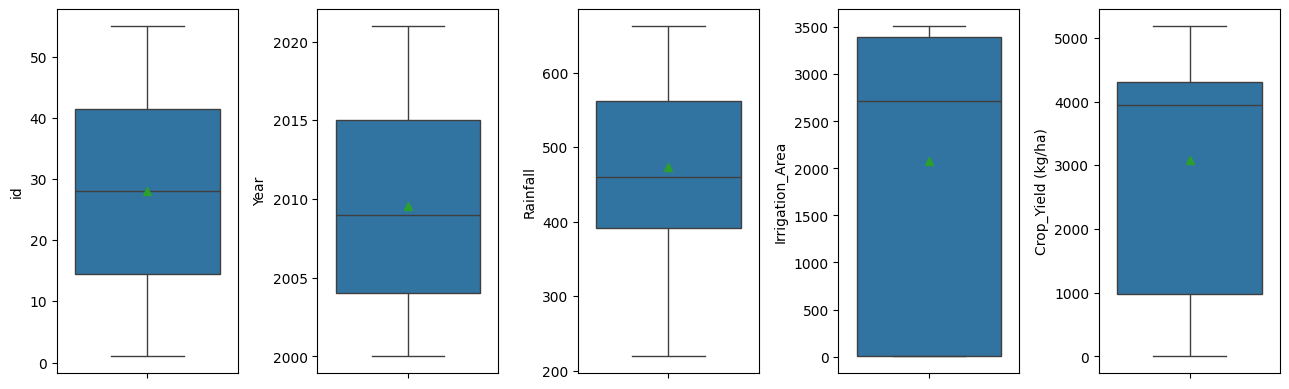

In [ ]:
cols = train.select_dtypes(include=['float64', 'int64']).columns
fig, ax = plt.subplots(1, len(cols), figsize = (13,4))
# Visualizing 5 numeric columns
for i, col in enumerate(cols):
  sns.boxplot(train, y = col, ax = ax[i], showmeans=True, legend=True)
plt.tight_layout()

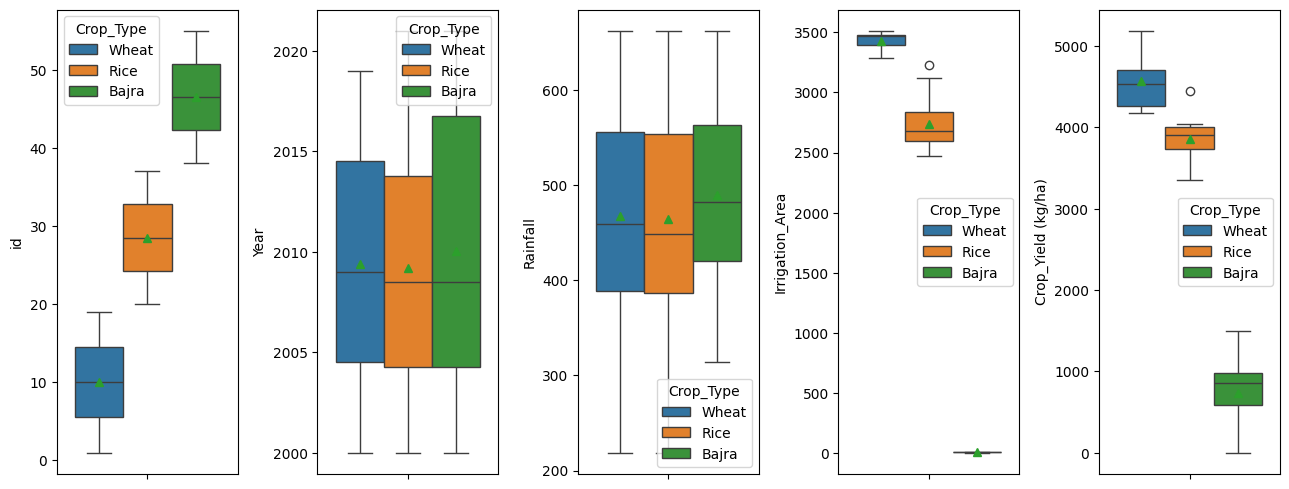

In [ ]:
cols = train.select_dtypes(include=['float64', 'int64']).columns
fig, ax = plt.subplots(1, len(cols), figsize = (13,5))
# Visualizing 5 numeric columns
for i, col in enumerate(cols):
  sns.boxplot(train, y = col, ax = ax[i], showmeans=True, hue= 'Crop_Type', legend=True)
plt.tight_layout()

## Categorical Variables

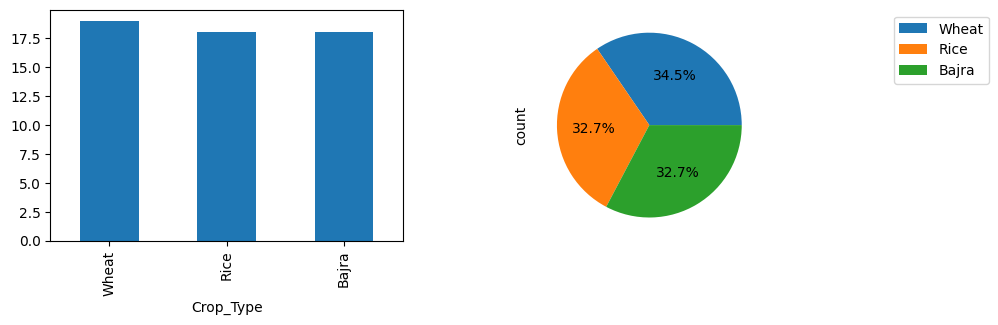

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,3))
train['Crop_Type'].value_counts().plot(kind='bar', ax = ax[0])
train['Crop_Type'].value_counts().plot(kind='pie', ax = ax[1], labeldistance = None,
                                           explode = None, autopct = '%1.1f%%', pctdistance = 0.6);
ax[1].legend(bbox_to_anchor=(1.5, 0, 0.5, 1));

**Insight**
* The Crop types are balanced
* Datasets have ~32% of each crop types

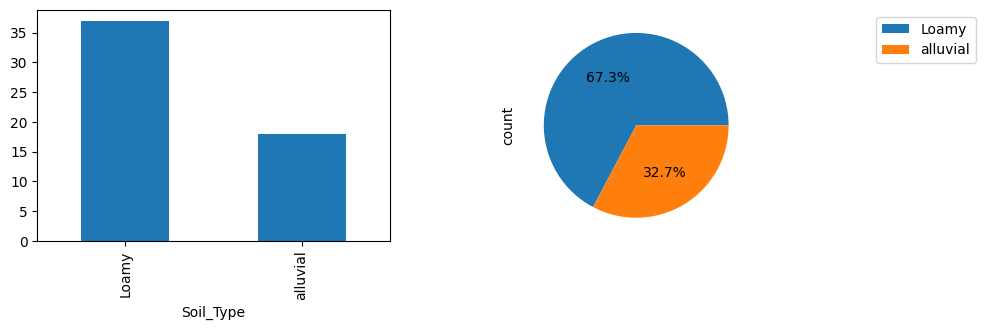

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10,3))
train['Soil_Type'].value_counts().plot(kind='bar', ax = ax[0])
train['Soil_Type'].value_counts().plot(kind='pie', ax = ax[1], labeldistance = None,
                                           explode = None, autopct = '%1.1f%%', pctdistance = 0.6);
ax[1].legend(bbox_to_anchor=(1.5, 0, 0.5, 1));

**Insight**
* Alluvial soil type has 32% shares of the dataset
* Loamy soil type has 67% shares of the dataset

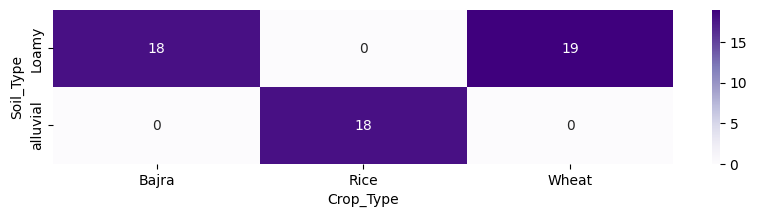

In [ ]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.heatmap(pd.crosstab(train['Soil_Type'], train['Crop_Type']), annot=True, fmt='d', cmap='Purples', ax=ax);

**Insight**
* The Bajra and Wheat are exclusively grown on Loamy Soil
* Rice is exclusively grown in alluvial soil
* The soil type is implied in Crop Type, therefore not necessary to represent Soil Type

## Time Series Visualization

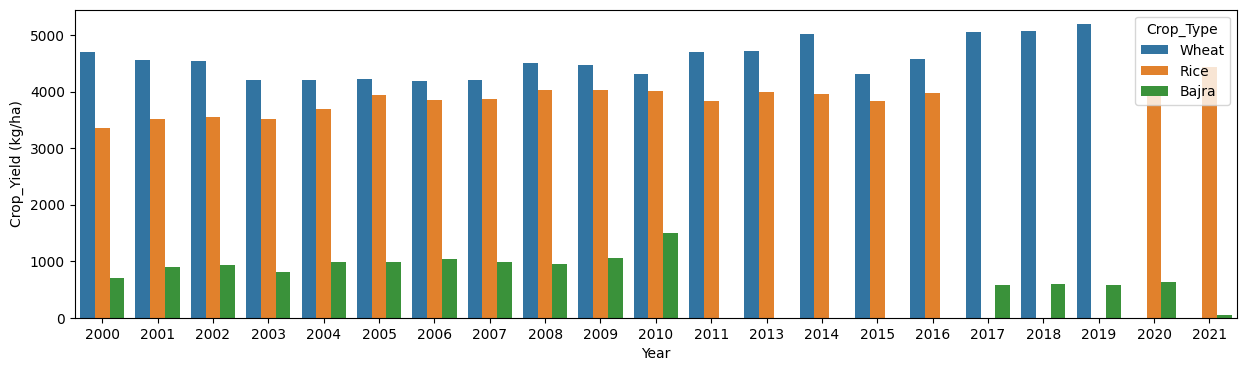

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.barplot(x='Year', y='Crop_Yield (kg/ha)', data=train, ax = ax, hue='Crop_Type');

**Insight**
* Crop Yield data is available from 2000 to 2019
* Crop Yield data is available from 2000 to 2016, 2022 to 2021
* Crop Yield data is available from 2000 to 2010, 2017 to 2019

This data is a Time series forecasting problem, that predicts the Crop yield from past data.

## Correlation matrix

<Axes: >

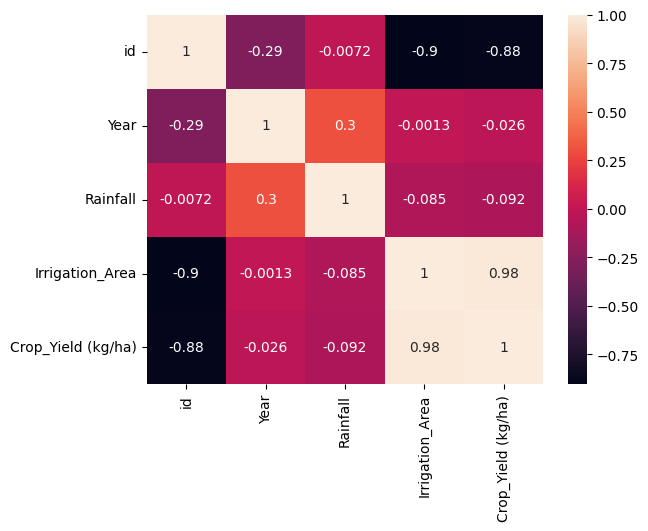

In [ ]:
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot=True)

**Insight**
* Crop yield has high correlation with Irrigation Area
* Year and Rainfall has high correlation

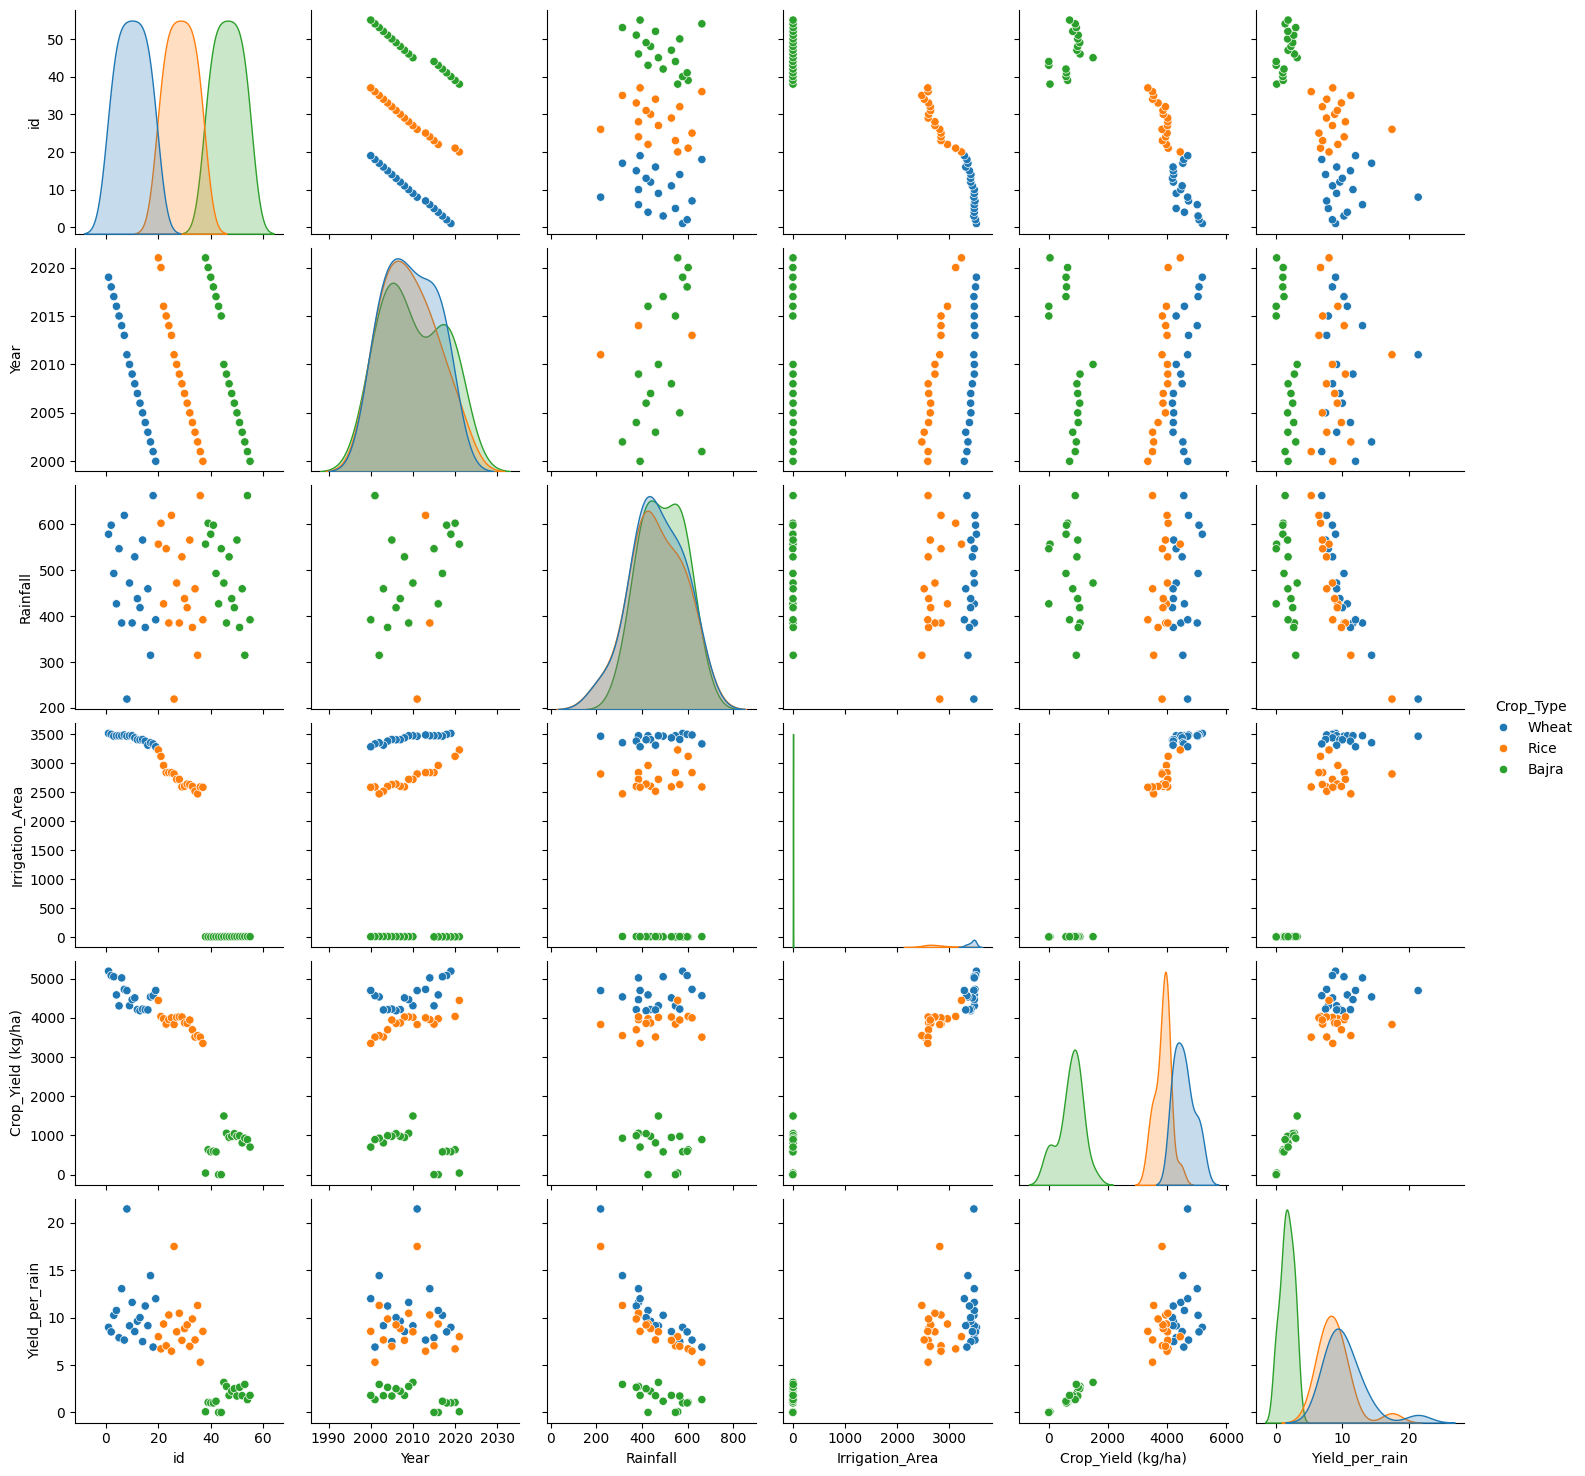

In [ ]:
sns.pairplot(train, hue='Crop_Type');

**Insight**
* most features are correlated to Id, but that's just how they are arranged, not a real correlation.

* Crop Yield is correlated with Rainfall and Irrigation Area

# Hypothesis testing

Null Hypothesis (H0): There is no significant correlation between the given column and crop yield (i.e., they are independent).


Alternative Hypothesis (H1): There is a significant correlation between the given column and crop yield (i.e., they are dependent).

**Irrigation Area Vs Crop Yield**

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

df = train.copy()#[train.Crop_Type == 'Wheat'][['Irrigation_Area', 'Crop_Yield (kg/ha)']]

corr_coef, p_value = pearsonr(df['Irrigation_Area'], df['Crop_Yield (kg/ha)'])

print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"p-value: {p_value}")

alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print(f"Reject the null hypothesis. Irrigation_Area and Crop yield are dependent")
else:
    print(f"Fail to reject the null hypothesis. Irrigation_Area and Crop yield are independent")

Pearson Correlation Coefficient: 0.9842870487305871
p-value: 1.354341169656547e-41
Reject the null hypothesis. Irrigation_Area and Crop yield are dependent


Crop Yield is dependent on Irrigation Area

**Rainfall Vs Crop Yield**

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

df = train.copy()
corr_coef, p_value = pearsonr(df['Rainfall'], df['Crop_Yield (kg/ha)'])

print(f"Pearson Correlation Coefficient: {corr_coef}")
print(f"p-value: {p_value}")

alpha = 0.05

# Hypothesis testing
if p_value < alpha:
    print(f"Reject the null hypothesis. Rainfall and Crop yield are dependent")
else:
    print(f"Fail to reject the null hypothesis. Rainfall and Crop yield are independent")

Pearson Correlation Coefficient: -0.09214849524196897
p-value: 0.5034185221216504
Fail to reject the null hypothesis. Rainfall and Crop yield are independent


Crop Yield is independent on Irrigation Area

## Regression Analysis

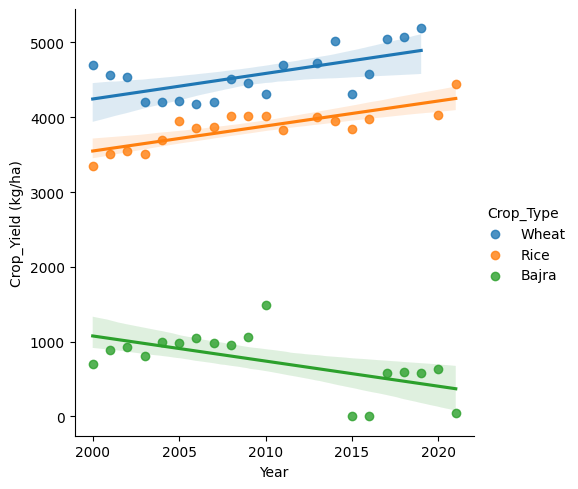

In [ ]:
sns.lmplot(x='Year', y='Crop_Yield (kg/ha)', data=train, hue='Crop_Type', order = 1);

**Insight**
* There's a linear relationship between Year and Crop yield

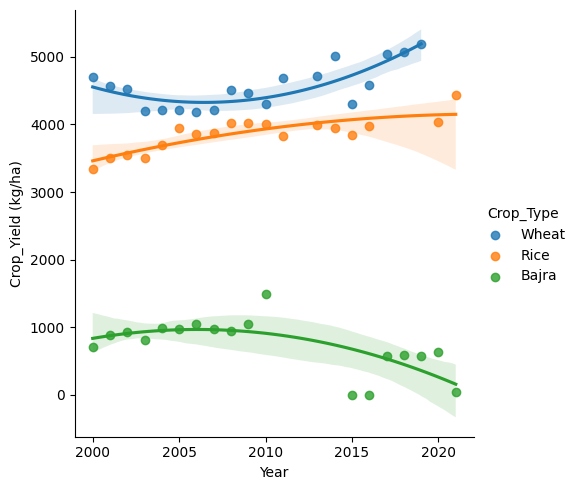

In [ ]:
sns.lmplot(x='Year', y='Crop_Yield (kg/ha)', data=train, hue='Crop_Type', order = 2);

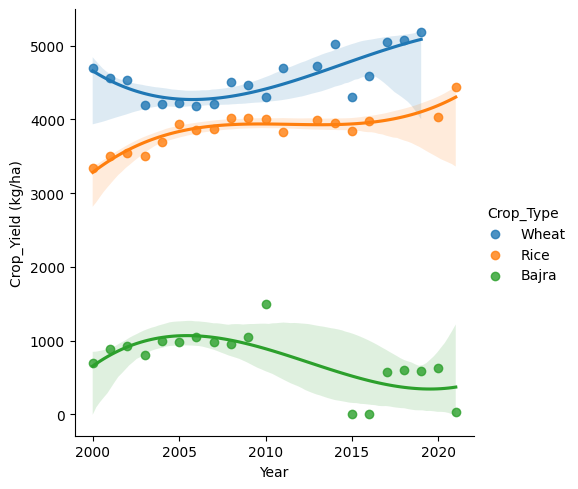

In [ ]:
sns.lmplot(x='Year', y='Crop_Yield (kg/ha)', data=train, hue='Crop_Type', order = 3);

**Irrigation Area Vs Crop Yield**

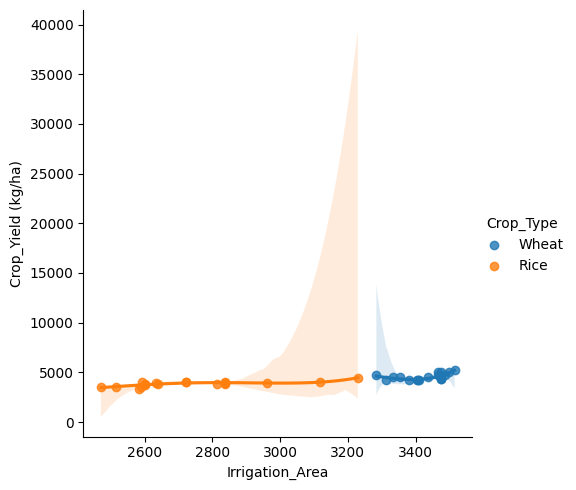

In [ ]:
sns.lmplot(x='Irrigation_Area', y='Crop_Yield (kg/ha)', data=train[train.Irrigation_Area > 100], order =4, hue='Crop_Type');

**Insight**
* Irrigation Area is highly correlated with Crop Yield
* We can use this to predict more accurately

This problem comes down to Curve fitting

# Curve Fitting

### Year Vs Crop Yield

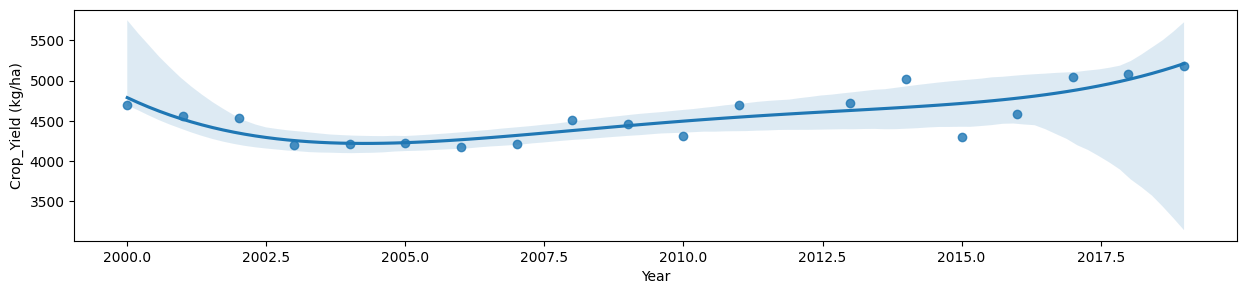

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.regplot(x='Year', y='Crop_Yield (kg/ha)',
            data=train[(train.Crop_Type == 'Wheat')],
            order =4, ax = ax);

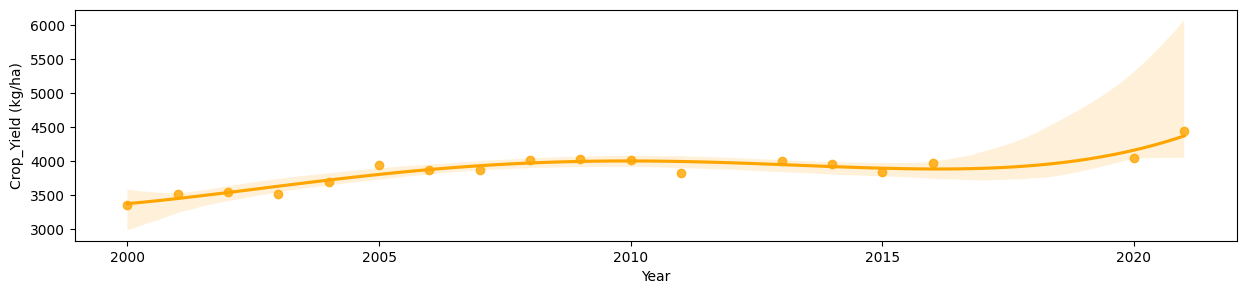

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.regplot(x='Year', y='Crop_Yield (kg/ha)',
            data=train[(train.Crop_Type == 'Rice')],
            order =4, ax = ax, color = 'Orange');

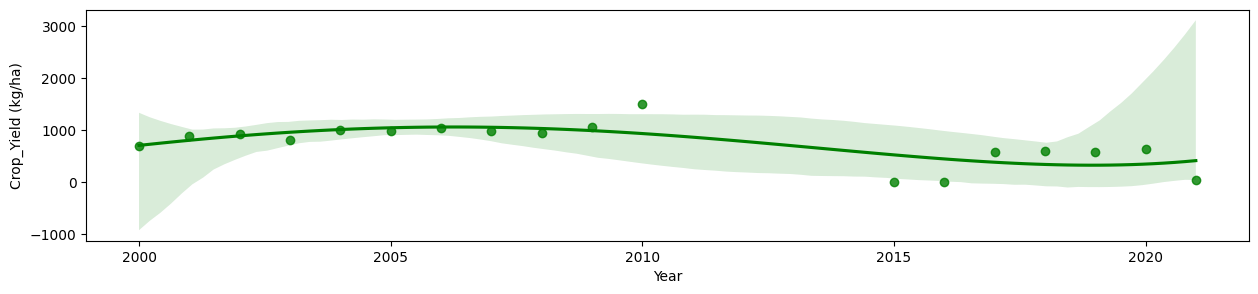

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.regplot(x='Year', y='Crop_Yield (kg/ha)',
            data=train[(train.Crop_Type == 'Bajra')],
            order =4, ax = ax, color='green');

### Irrigation Area Vs Crop Yield

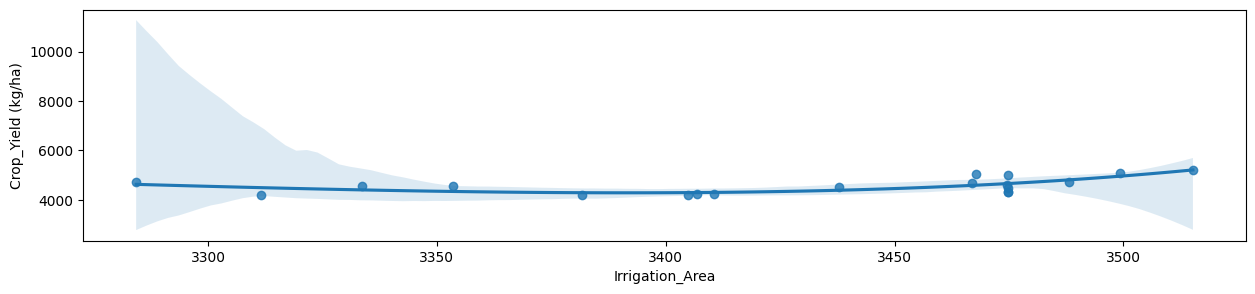

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.regplot(x='Irrigation_Area', y='Crop_Yield (kg/ha)',
            data=train[(train.Crop_Type == 'Wheat')],
            order =4, ax = ax);

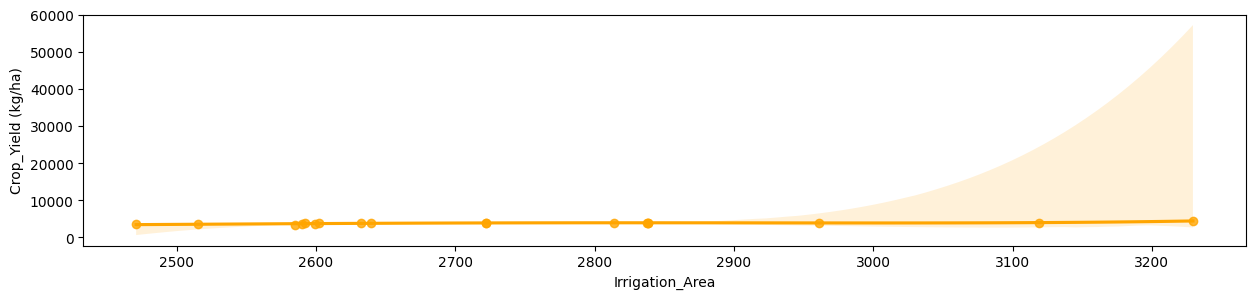

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.regplot(x='Irrigation_Area', y='Crop_Yield (kg/ha)',
            data=train[(train.Crop_Type == 'Rice')],
            order =4, ax = ax, color = 'Orange');

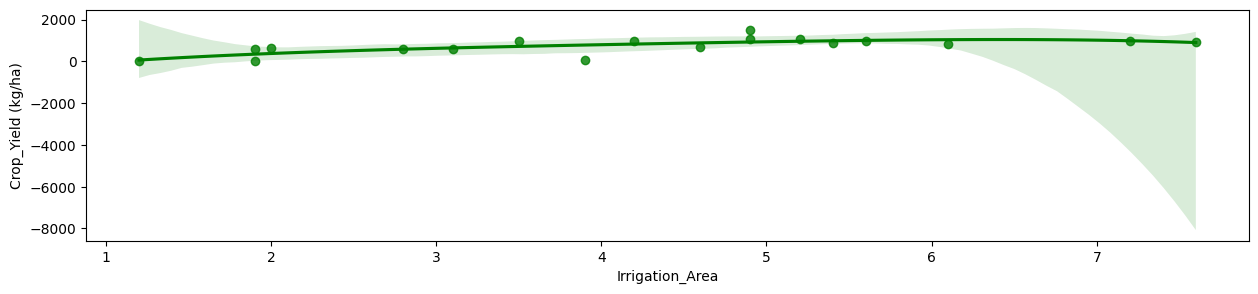

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.regplot(x='Irrigation_Area', y='Crop_Yield (kg/ha)',
            data=train[(train.Crop_Type == 'Bajra')],
            order =4, ax = ax, color = 'Green');

We can use these relation to build our own machine learning algorithm to predict Crop Yield

# Data Preprocessing

In [ ]:
X = train[['Year', 'Rainfall', 'Irrigation_Area', 'Crop_Type', 'Soil_Type']]
y = train['Crop_Yield (kg/ha)']

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning

Let's define a function for cross validation

In [ ]:
def cv_regression(model):
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import cross_val_score
  scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
  scores = -scores
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  plt.bar(range(len(scores)), scores, tick_label=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'], color='#980000')
  plt.xlabel('Fold')
  plt.ylabel('MSE')
  plt.title('Cross validation Scores')
  plt.figtext(0.5, -0.02, "Mean CV score: "+str(scores.mean().round(3)), ha="center", fontsize=10)
  plt.figtext(0.5, -0.07, "Test MSE score: "+str(round(mse, 3)), ha="center", fontsize=10)
  plt.show()
  return

# Custom Machine Learning model

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin

class CustomRegressor(BaseEstimator, RegressorMixin):
    """
    Custom ML model that inherits from sklearn's BaseEstimator and RegressorMixin.
    """

    def __init__(self, degree_wheat=2, degree_rice=2, degree_bajra=3):
        self.degree_wheat = degree_wheat
        self.degree_rice = degree_rice
        self.degree_bajra = degree_bajra
        self.poly_wheat = None
        self.poly_rice = None
        self.poly_bajra = None
        self.model_ = None

    def fit(self, X, y):
        self.model_ = "Trained with degree_wheat={} and \
                       degree_rice={} and degree_bajra={}".format(self.degree_wheat, self.degree_rice, self.degree_bajra)
        #join x and y
        df = pd.concat([X, y], axis=1)
        dr_wheat = df[df['Crop_Type'] == 'Wheat'].copy()
        dr_rice = df[df['Crop_Type'] == 'Rice'].copy()
        dr_bajra = df[df['Crop_Type'] == 'Bajra'].copy()

        # X and y for different crop type
        X_wheat = dr_wheat['Irrigation_Area']
        y_wheat = dr_wheat['Crop_Yield (kg/ha)']

        X_rice = dr_rice['Irrigation_Area']
        y_rice = dr_rice['Crop_Yield (kg/ha)']

        X_bajra = dr_bajra['Irrigation_Area']
        y_bajra = dr_bajra['Crop_Yield (kg/ha)']

        # polynomial fit
        self.poly_wheat = np.polyfit(X_wheat, y_wheat, deg=self.degree_wheat)
        self.poly_rice = np.polyfit(X_rice, y_rice, deg=self.degree_rice)
        self.poly_bajra = np.polyfit(X_bajra, y_bajra, deg=self.degree_bajra)

        return self

    def predict(self, X):
        """ Predicts from the data """
        df = X.copy()
        df.loc[df['Crop_Type'] == 'Wheat','y'] = np.polyval(self.poly_wheat, df.loc[df['Crop_Type'] == 'Wheat','Irrigation_Area'])
        df.loc[df['Crop_Type'] == 'Rice','y'] = np.polyval(self.poly_rice, df.loc[df['Crop_Type'] == 'Rice','Irrigation_Area'])
        df.loc[df['Crop_Type'] == 'Bajra','y'] = np.polyval(self.poly_bajra, df.loc[df['Crop_Type'] == 'Bajra','Irrigation_Area'])
        return df['y'].values

    def get_params(self, deep=True):
        """ Get parameters for this estimator. """
        return {'degree_wheat': self.degree_wheat, 'degree_rice': self.degree_rice, 'degree_bajra': self.degree_bajra}

    def set_params(self, **params):
        """ Set the parameters of this estimator. """
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def equation(self, crop_type = 'Wheat'):
        """ Equation of the model """
        if crop_type == 'Wheat':
          coeffs = self.poly_wheat
          deg= len(coeffs) - 1
        elif crop_type == 'Rice':
          coeffs = self.poly_rice
          deg= len(coeffs) - 1
        elif crop_type == 'Bajra':
          coeffs = self.poly_bajra
          deg= len(coeffs) - 1

        equation = ""

        for i in range(deg + 1):
          coeff = coeffs[i]
          power = deg - i

          if coeff != 0:
              if power == 0:
                  equation += f"{coeff:.4f}"
              elif power == 1:
                  equation += f"{coeff:.4f}x"
              else:
                  equation += f"{coeff:.4f}x^{power}"

          if i < deg and coeffs[i + 1] > 0:
              equation += " + "
          elif i < deg and coeffs[i + 1] < 0:
              equation += " + "

        return equation

# Example usage:
my_regressor = CustomRegressor()
my_regressor.fit(X_train, y_train)
y_pred = my_regressor.predict(X_test)

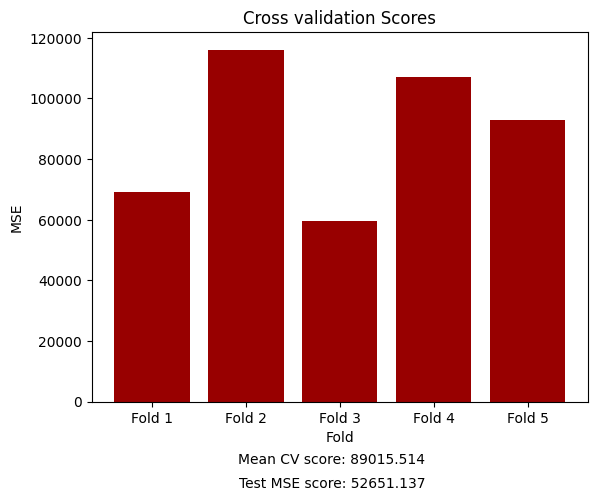

In [ ]:
cv_regression(my_regressor)

# Comparing our Model performance with other Machine Learning models

## Linear models

**Linear Regression**

In [ ]:
# linear regression, K-fold CV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

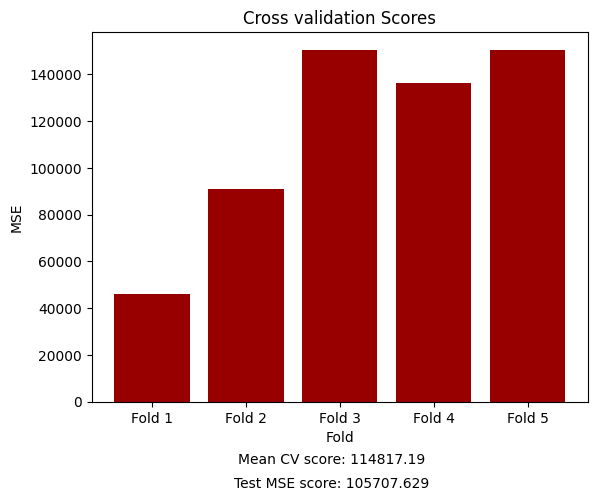

In [ ]:
cv_regression(lr)

**Ridge Regression**

In [ ]:
#ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

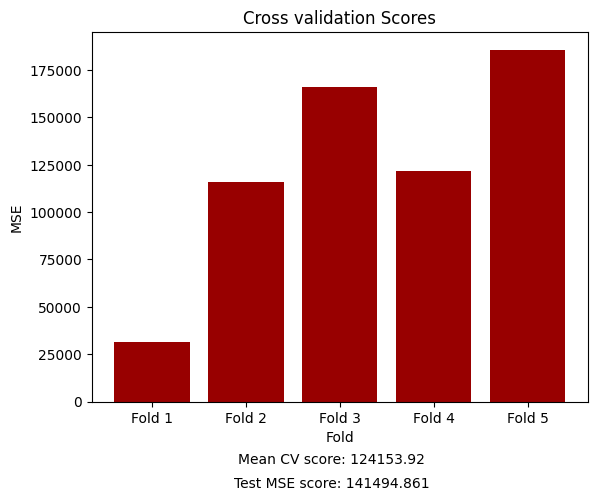

In [ ]:
cv_regression(ridge)

**Lasso Regression**

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

Lasso()

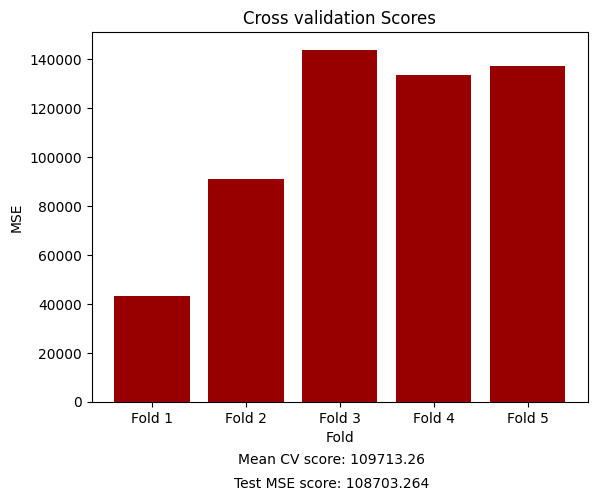

In [ ]:
cv_regression(lasso)

## Decision Trees

**Decision Tree Regressor**

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

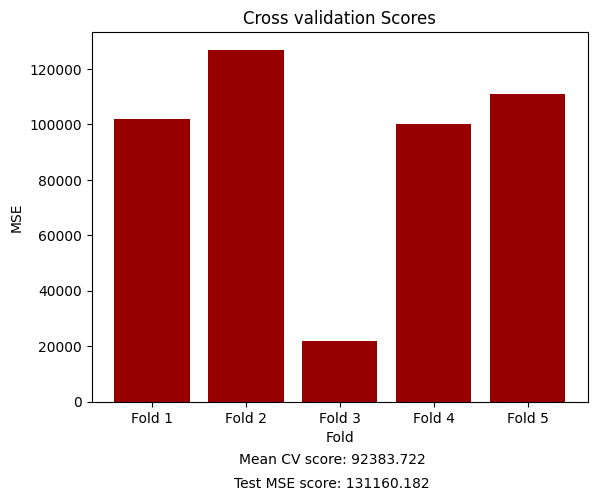

In [ ]:
cv_regression(dt)

**AdaBoost Regressor**

In [ ]:
# Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

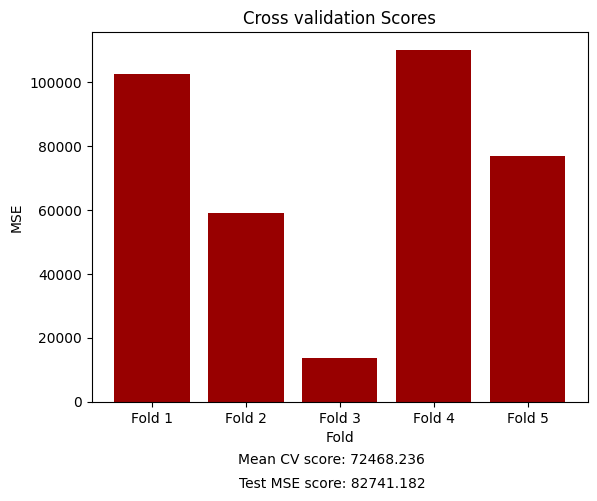

In [ ]:
cv_regression(ada)

**Extra Tree Regressor**

In [ ]:
# Extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)

ExtraTreesRegressor()

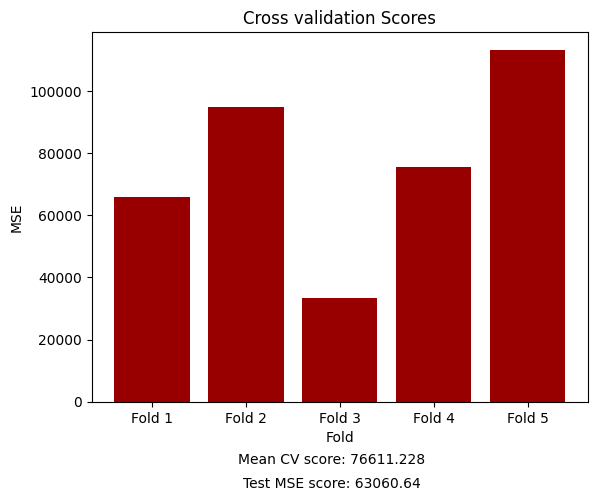

In [ ]:
cv_regression(etr)

## Gradient Boosting models

**CatBoost Regressor**

In [ ]:
# CatBoost Regressor
from catboost import CatBoostRegressor
cat = CatBoostRegressor(verbose = 0)
cat.fit(X_train, y_train)

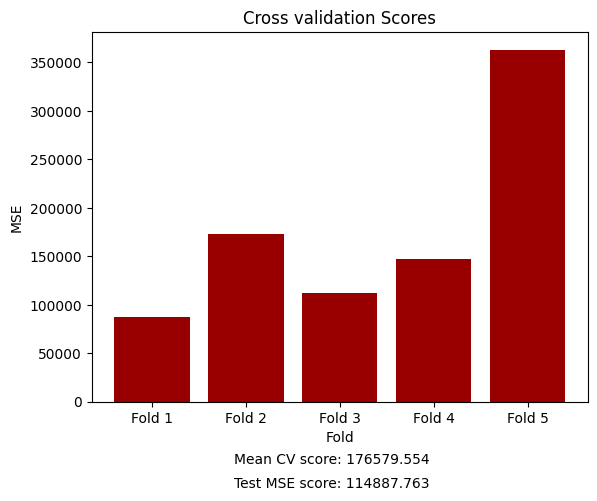

In [ ]:
cv_regression(cat)

## Ensemble Techniques

**Random forest regressor**

In [ ]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

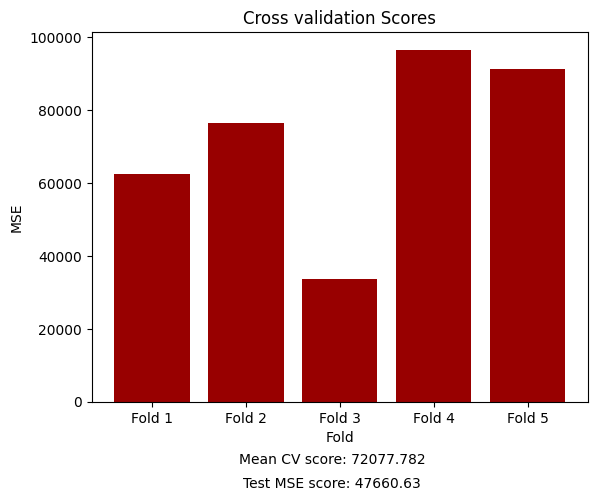

In [ ]:
cv_regression(rf)

**Bagging Regressor**

In [ ]:
# Bagging Regressor
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor()
bag.fit(X_train, y_train)

BaggingRegressor()

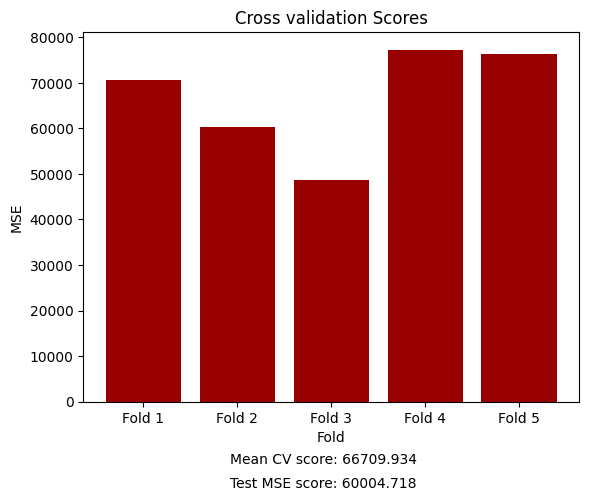

In [ ]:
cv_regression(bag)

# Model Accuracy

Lets compare our model's accuracy with all other models

In [ ]:
df = pd.read_csv('model_metrics.csv')

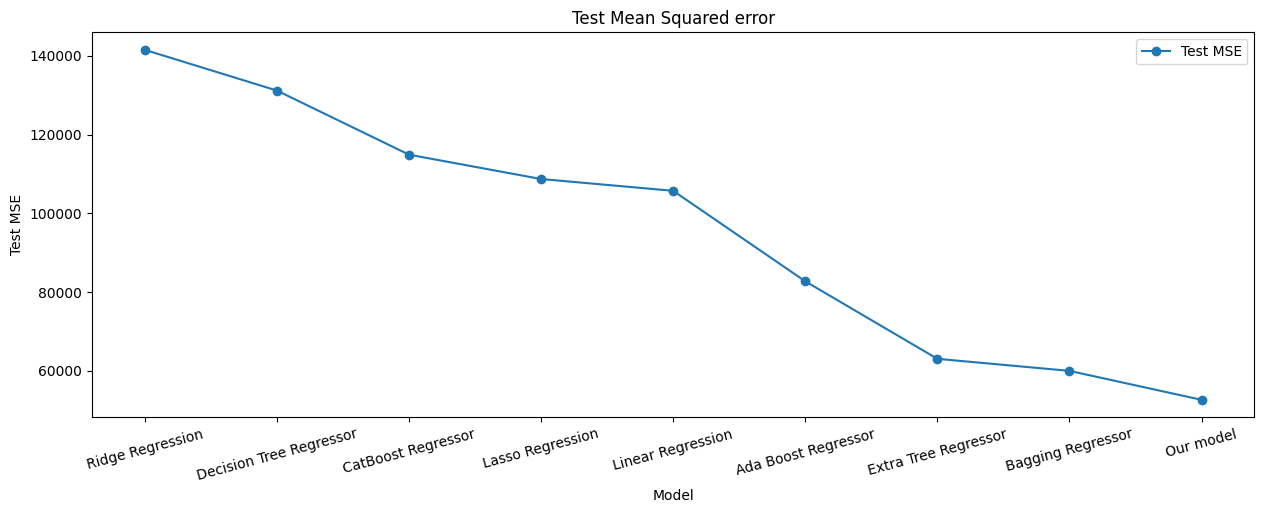

In [ ]:
df.sort_values(by='Test MSE', ascending=False).reset_index().plot(kind='line', x='Model', y='Test MSE', figsize=(15,5), marker='o')
plt.xticks(rotation=15)
plt.xlabel('Model')
plt.ylabel('Test MSE')
plt.title('Test Mean Squared error')
plt.show()

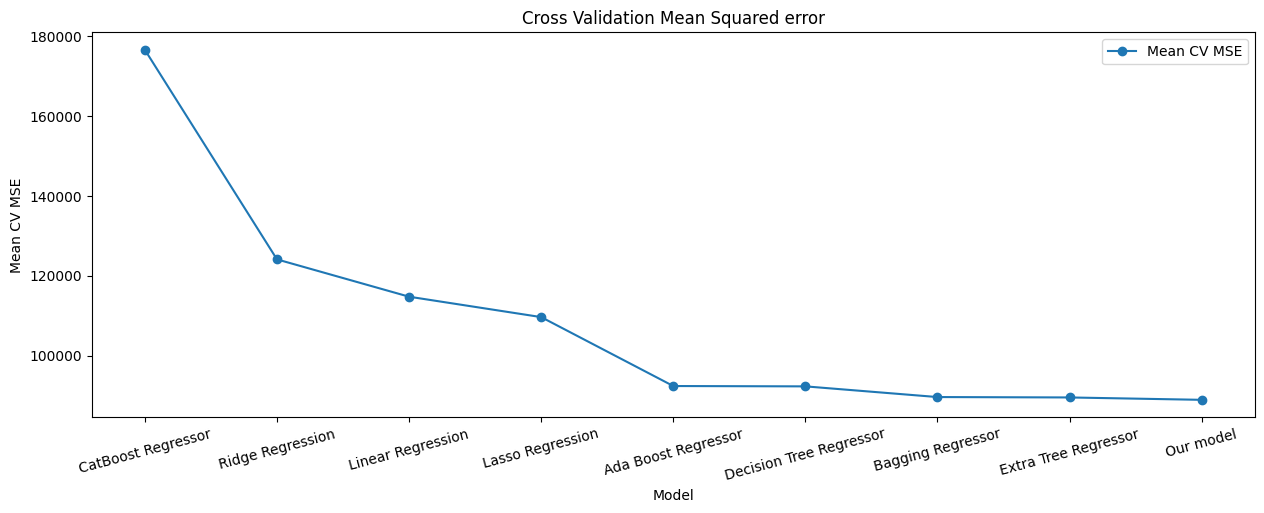

In [ ]:
df.sort_values(by='Mean CV MSE', ascending=False).reset_index().plot(kind='line', x='Model', y='Mean CV MSE', figsize=(15,5), marker='o')
plt.xticks(rotation=15)
plt.xlabel('Model')
plt.ylabel('Mean CV MSE')
plt.title('Cross Validation Mean Squared error')
plt.show()

Our model is performing better than other machine learning models

# Symbolic Regression analysis

Explainable AI: Our model can provide the equation for explanability which would help us in model deployment

In [ ]:
my_regressor = CustomRegressor()
my_regressor.fit(X, y)

CustomRegressor()

In [ ]:
my_regressor.equation(crop_type = 'Wheat')

'0.0476x^2 + -321.8394x + 548183.1840'

In [ ]:
my_regressor.equation(crop_type = 'Rice')

'-0.0004x^2 + 2.9304x + -1523.5508'

In [ ]:
my_regressor.equation(crop_type = 'Bajra')

'-0.7916x^3 + -24.9360x^2 + 402.8957x + -347.3506'

# Business recomendations

1. Crop Selection and Rotation: Identify the most suitable crops for specific fields based on soil type, climate, and market demand. This can increase profitability and improve soil health through crop rotation practices.
2. Risk Management: Assess potential risks such as droughts, floods, and pests, and implement mitigation strategies like crop insurance or alternative cultivation techniques.
3. Optimal Planting and Harvesting Times: Predict the most suitable planting and harvesting windows based on historical weather patterns, soil conditions, and expected yield. This helps maximize output and minimize risks associated with adverse weather events.
4. Precision Irrigation and Fertilization: Optimize water and fertilizer usage based on predicted crop needs. This conserves resources, reduces costs, and minimizes environmental impact.
5. Market Forecasting: Predict future crop prices based on historical trends, weather patterns, and global market demand. This information can help farmers make informed decisions about planting, harvesting, and selling their crops.
6. Resource Allocation: Optimize the allocation of resources such as labor, machinery, and finances based on predicted yield and market conditions.
7. Technology Adoption: Identify and adopt new technologies such as precision agriculture tools, drones, and satellite imagery to improve farm efficiency and productivity.

# Conclusion

Predicting crop yield accurately is paramount for ensuring food security and optimizing agricultural practices. Machine learning offers powerful tools to achieve this, with various models demonstrating varying strengths and weaknesses. Linear models provide a simple and interpretable starting point, but their applicability is limited by the assumption of linearity. Decision tree models offer greater flexibility by capturing non-linear relationships, while ensemble methods further enhance accuracy and robustness.


By leveraging these models and incorporating insights from data analysis, farmers can gain valuable knowledge. This includes optimizing planting and harvesting schedules, improving irrigation and fertilization practices, selecting the most suitable crops, and effectively managing risks. Ultimately, these data-driven approaches empower farmers to make informed decisions, increase their profitability, and contribute to a more sustainable and resilient agricultural system.
